In [1]:
# Librerías

import matplotlib
from scipy import misc
from scipy import stats
from scipy import special
import pylab as plt
import numpy as np
import math

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

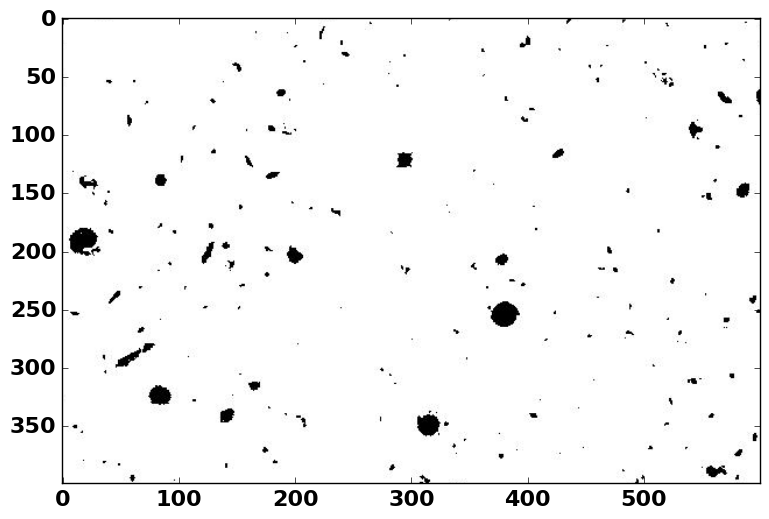

In [3]:
Ima = misc.imread('HDF-bw.jpg') # Se lee la imagen como matriz en escala de 8 bit
plt.rcParams['figure.figsize'] = 20, 6 # para modificar el tamaño de la figura
Imab = Ima[100:500,100:700,1] # La imagen original tenía tres canales (RGB); se elige un canal y se recorta

plt.figure(2)
plt.imshow(Imab, cmap='gray')

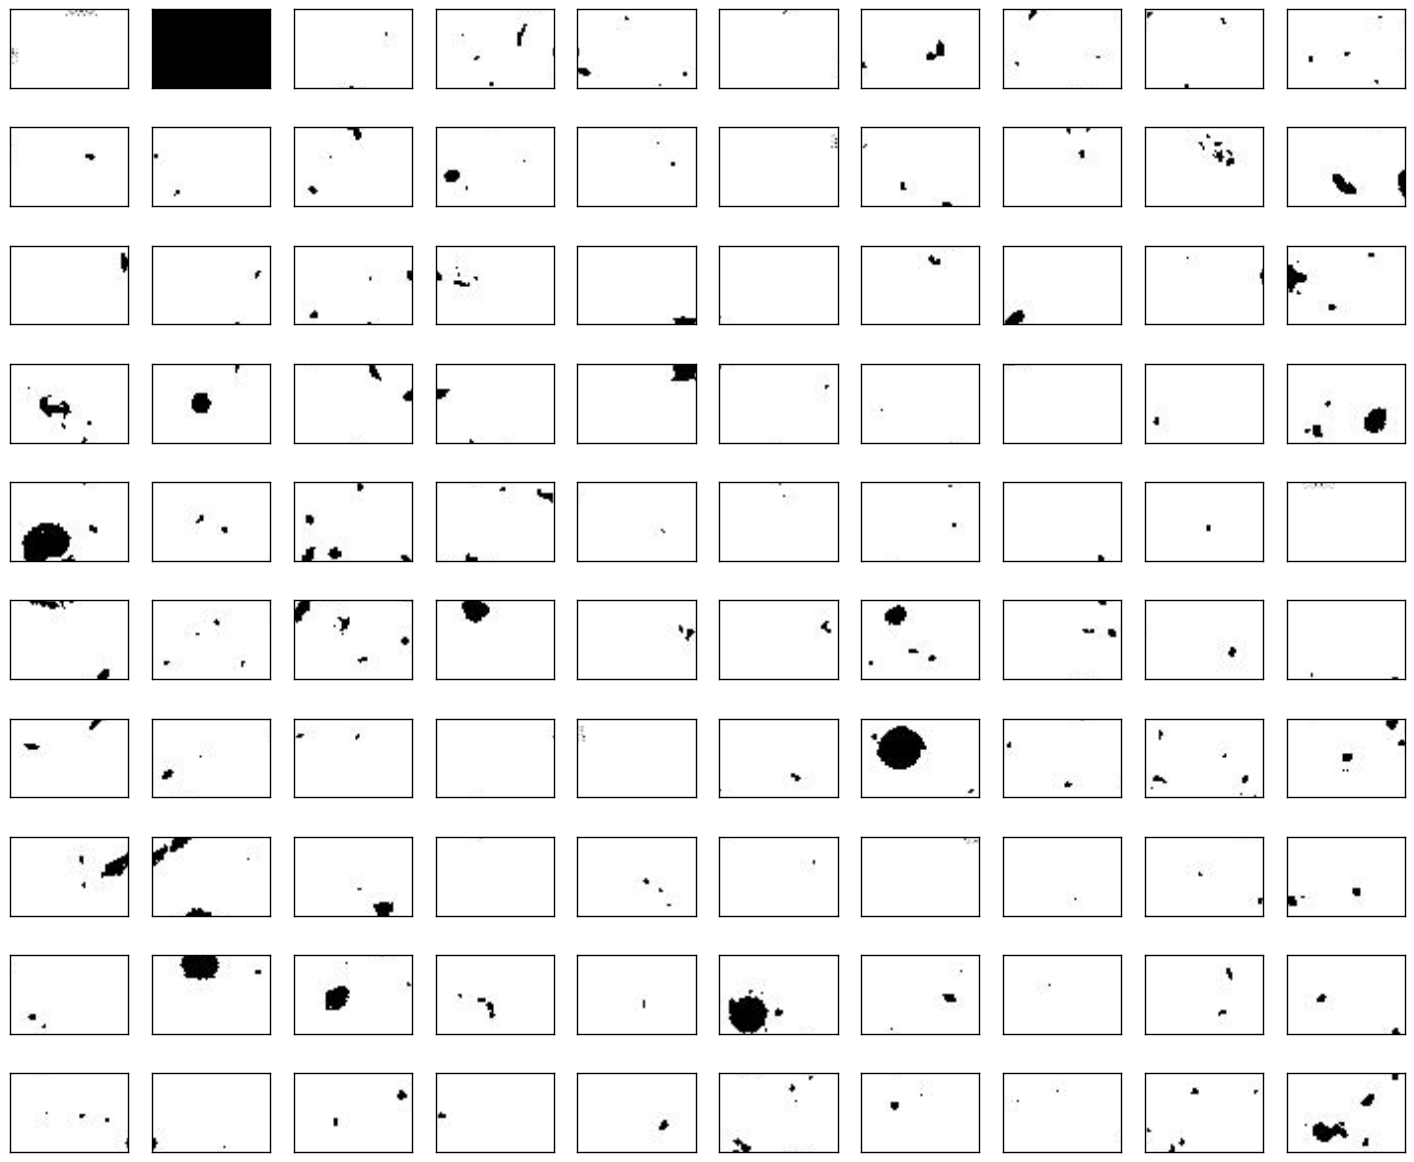

In [4]:
plt.rcParams['figure.figsize'] = 18, 15 # para modificar el tamaño de la figura
fil, col = Imab.shape # número de filas y columnas de la imagen
numlado = 10 # Número de imágenes por lado
contar = 1
plt.figure(5)
for enfil in range(1,numlado+1):
    for encol in range(1,numlado+1):
        plt.subplot(numlado,numlado,contar)
        plt.imshow(Imab[(enfil-1)*np.int(fil/numlado):enfil*np.int(fil/numlado), \
                        (encol-1)*np.int(col/numlado):encol*np.int(col/numlado)],cmap='gray')
        frame1 = plt.gca()
        frame1.axes.get_yaxis().set_visible(False)
        frame1.axes.get_xaxis().set_visible(False)
        contar = contar + 1

Valor promedio del conjunto de datos = 2.20


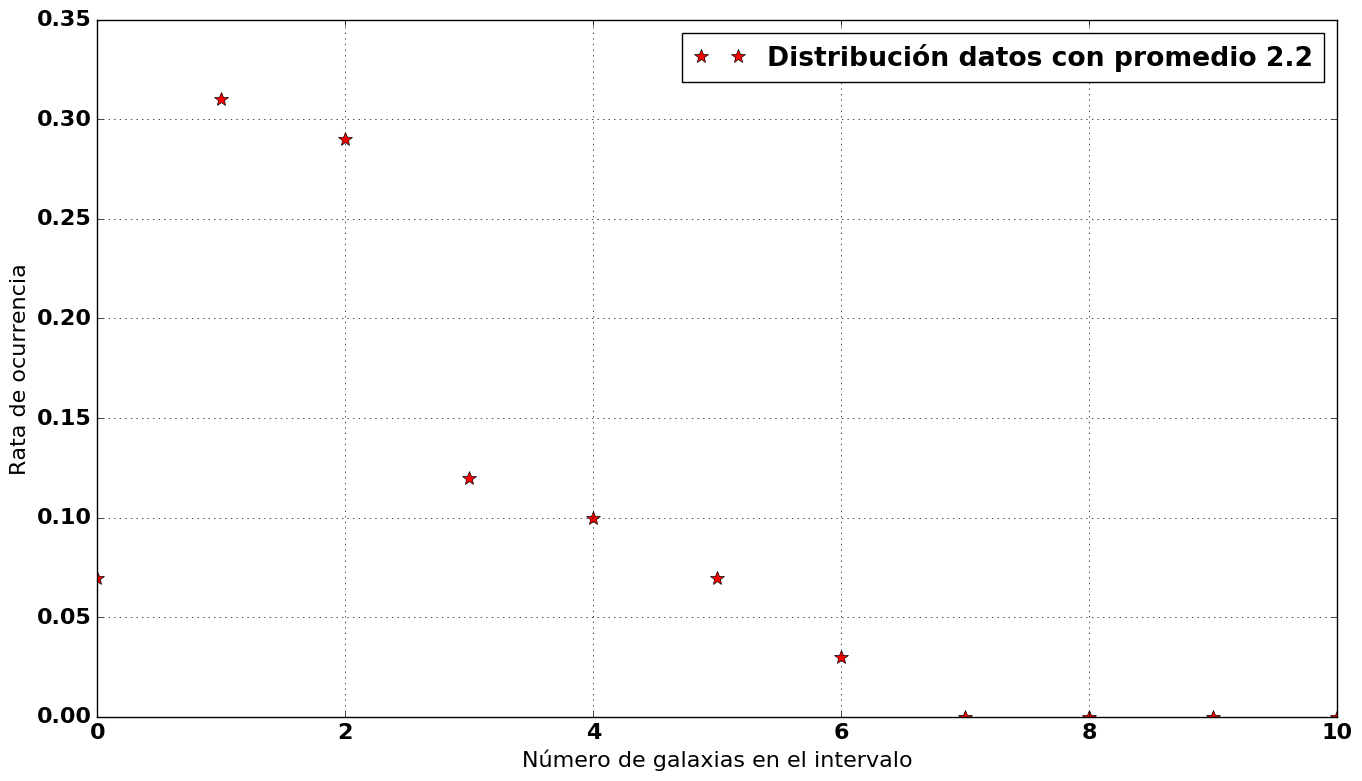

In [6]:
# Para el caso de 7x7 imágenes en gal se presentan el número de galaxias contadas
gal = np.array([2., 0., 2., 4., 5., 1., 2., 3., 3., 4., \
                1., 2., 2., 3., 2., 1., 2., 3., 6., 2., \
               1., 2., 3., 4., 1., 0., 1., 1., 1., 5., \
               5., 1., 2., 1., 0., 1., 1., 0., 1., 4., \
               2., 2., 5., 3., 1., 2., 2., 1., 1., 1., \
               1., 4., 5., 0., 2., 1., 4., 2., 1., 2., \
                1., 2., 2., 1., 0., 2., 3., 2., 6., 4., \
                3., 3., 2., 0., 3., 1., 1., 1., 2., 2., \
                2., 1., 3., 4., 1., 5., 3., 1., 2., 2., \
               4., 1., 2., 1., 1., 6., 2., 2., 5., 4.])
la = np.mean(gal) # Valor promedio del conjunto de datos

# Distribución del conjunto de datos. La primera fila es el número de galaxias, la segunda es el número de veces que
# se repite dicho número de galaxias
distriGal = np.array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.],[7., 31., 29., 12., 10., 7., 3., 0., 0., 0., 0.]])

print('Valor promedio del conjunto de datos = %.2f' % la)
plt.figure(figsize=(16,9))
plt.plot(distriGal[0,:],distriGal[1,:]/gal.size,'r*',ms=10,label='Distribución datos con promedio %.1f' % la)
plt.legend()
plt.xlabel('Número de galaxias en el intervalo')
plt.ylabel('Rata de ocurrencia')
plt.grid()

In [7]:
num = 2. # Número de galaxias que se espera encontrar
prob = (la**num*np.exp(-la)/math.factorial(num))*100 # Probabilidad de encontrar dicho número de galaxias

x = np.arange(0,20) # rango de datos: número de galaxias
histP = stats.poisson.pmf(x, la) # función de probabilidad de Poisson
ProbP = (np.sum(histP[0:int(num)+1]))*100 # Probabilidad acumulada

print('Promedio de galaxias en el área estudiada = %.2f' % la)
print('La probabilidad de que se observe en la imagen del espacio profundo %d galaxias es = %.1f%%' % (num,prob))
print('Probabilidad de observar hasta %d galaxias = %.1f%%' %(num,ProbP))

Promedio de galaxias en el área estudiada = 2.20
La probabilidad de que se observe en la imagen del espacio profundo 2 galaxias es = 26.8%
Probabilidad de observar hasta 2 galaxias = 62.3%


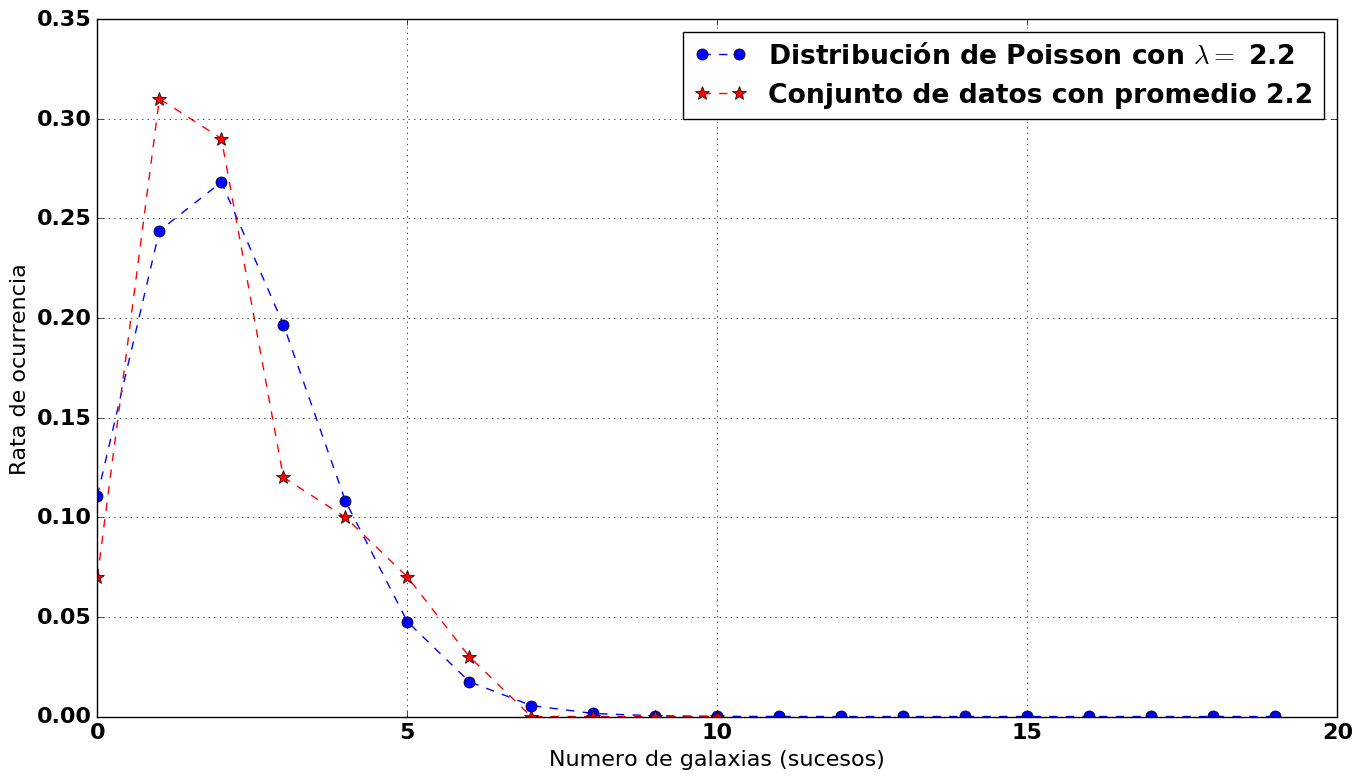

In [29]:
plt.figure(figsize=(16,9))
plt.plot(x, histP, 'bo--', ms=8, label='Distribución de Poisson con $\lambda=$ %.1f' % la)
plt.plot(distriGal[0,:],distriGal[1,:]/gal.size,'r--*',ms=10,label='Conjunto de datos con promedio %.1f' % la)
plt.xlabel('Numero de galaxias (sucesos)')
plt.ylabel('Rata de ocurrencia')
plt.legend()
plt.grid()

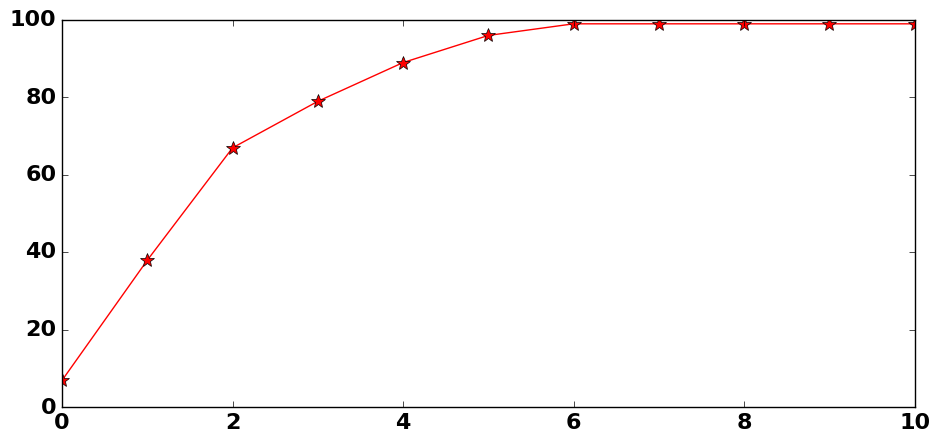

In [25]:
distriGal = np.array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.],[7., 31., 29., 12., 10., 7., 3., 0., 0., 0., 0.]])
distAcum=np.zeros(11)
suma=0

for i in range (0, 11):
    suma+=distriGal[1,i]
    distAcum[i]+=suma
    
#print (len(distAcum))
#print (len(distriGal[0,:]))

plt.rcParams['figure.figsize'] = 11, 5 # para modificar el tamaño de la figura
plt.plot(distriGal[0,:],distAcum,'r-*',ms=10,label='Conjunto de datos con promedio %.1f' % la)